## Adding noise to electron, alpha and muon signals

These files are stored in `/gpfs/projects/damic/eVSmuVSaVSn_4def`, where we can find electrons, muons, alphas and noise. We will select the electron, alpha and muon files (they have two variables: energy and noise), so we will add the noise stored in those files to the energy they also have as variable. As a result, we will obtain the noisy energy signals. These new signals (with just one varible: energy) together with the noise (as a class) can be found in a new directory called `/gpfs/projects/damic/eVSmuVSaVSn_N4def`.

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
path = '/gpfs/projects/damic/eVSmuVSa_LocN/'

In [3]:
os.mkdir(path)

In [3]:
orig_dir = '/gpfs/projects/damic/eVSmuVSa_Loc/'

In [5]:
num_files = len([f for f in os.listdir(orig_dir)if os.path.isfile(os.path.join(orig_dir, f))])
print('We have', num_files,'files')

num_electrons = len(glob.glob1(orig_dir,"*11.npz"))
num_muons = len(glob.glob1(orig_dir,"*13.npz"))
num_alphas = len(glob.glob1(orig_dir,"*1000020040.npz"))

print('There are',num_electrons,'electrons,', num_muons,'muons and',num_alphas, 'alphas')

We have 18277 files
There are 5835 electrons, 5224 muons and 7218 alphas


Now we proceed to add noise to the electron, alpha or muon signals:

In [ ]:
files = os.listdir(orig_dir)

for index, file in enumerate(files):
    
    energy_a = np.load(os.path.join(orig_dir,files[index]))['energy']
    noise_a = np.load(os.path.join(orig_dir, files[index]))['noise']
    
    #calculating the position of the box where is located the track
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located on the left bottom
    y_max, x_max = coords.max(axis=0) #coordinates of the element located on the right top
    
    loc_a = x_min, y_min, y_max-y_min, x_max-x_min
    
    energy_a = energy_a + noise_a
        
    #copying to the 'eVSmuVSa_LocN' directory
    np.savez(os.path.join(path, file), energy=energy_a, loc = loc_a)    
    print(index)

ColdCopper_3_PV_PV_212a83z_s73_N100000_image_evt_35864_ccd_1_ind_0_pdg_11.npz


Text(0.5, 1.0, 'Electron energy+noise')

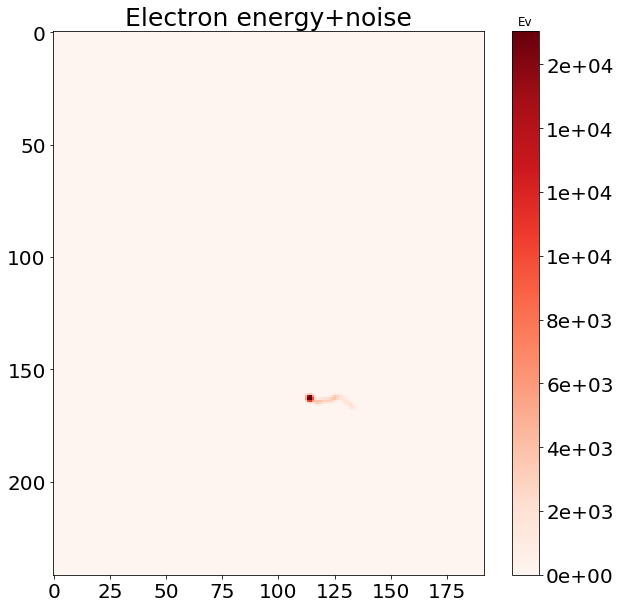

In [6]:
path = '/gpfs/projects/damic/eVSmuVSa_LocN/'
files = os.listdir(path)
f=9
print(files[f])
e = np.load(os.path.join(path, files[f]))['energy']

fig_e_n = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy+noise", fontsize = 25)

In [5]:
np.load(os.path.join(path, files[f]))['loc']

array([110, 159,  11,  26])

In [7]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a_loc/noisy'
fig_e_n.savefig(myPath + '/noisy_e.png')

CCDSensor_PV_alpha_inBulk_10p0MeVeV_N300_image_evt_172_ccd_2_ind_0_pdg_1000020040.npz


Text(0.5, 1.0, 'Alpha energy+noise')

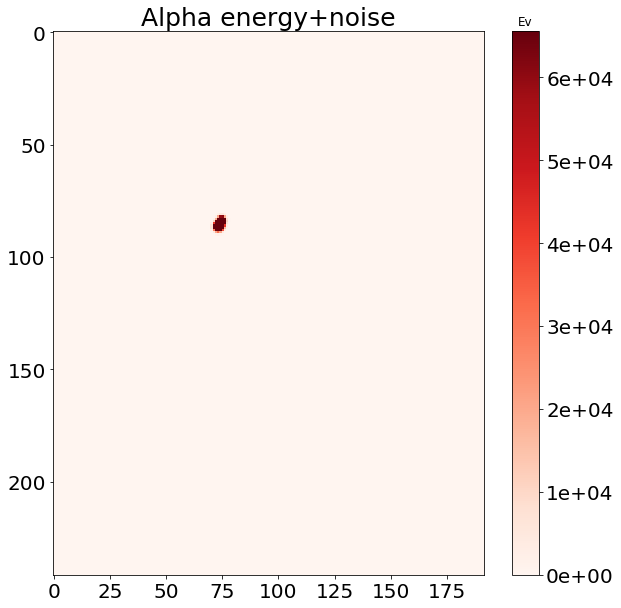

In [8]:
files = os.listdir(path)
f=769
print(files[f])
mu = np.load(os.path.join(path, files[f]))['energy']

fig_mu_n = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Alpha energy+noise", fontsize = 25)

In [9]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a_loc/noisy'
fig_mu_n.savefig(myPath + '/noisy_alpha.png')

Text(0.5, 1.0, 'Alpha energy')

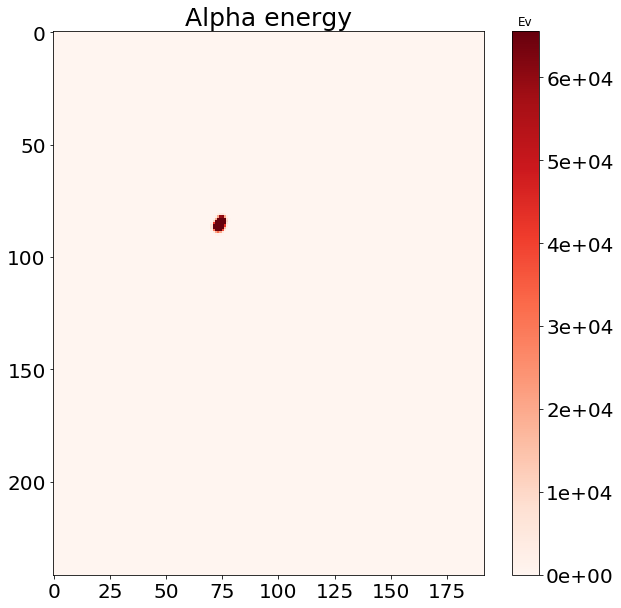

In [10]:
files = os.listdir(orig_dir)
f=769
mu_2 = np.load(os.path.join(orig_dir, files[f]))['energy']

fig_mu_n = plt.figure(figsize=(10,10))
plt.imshow(mu_2, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Alpha energy", fontsize = 25)

In [11]:
print(files[f])

CCDSensor_PV_alpha_inBulk_10p0MeVeV_N300_image_evt_172_ccd_2_ind_0_pdg_1000020040.npz


In [12]:
mu_2 == mu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])